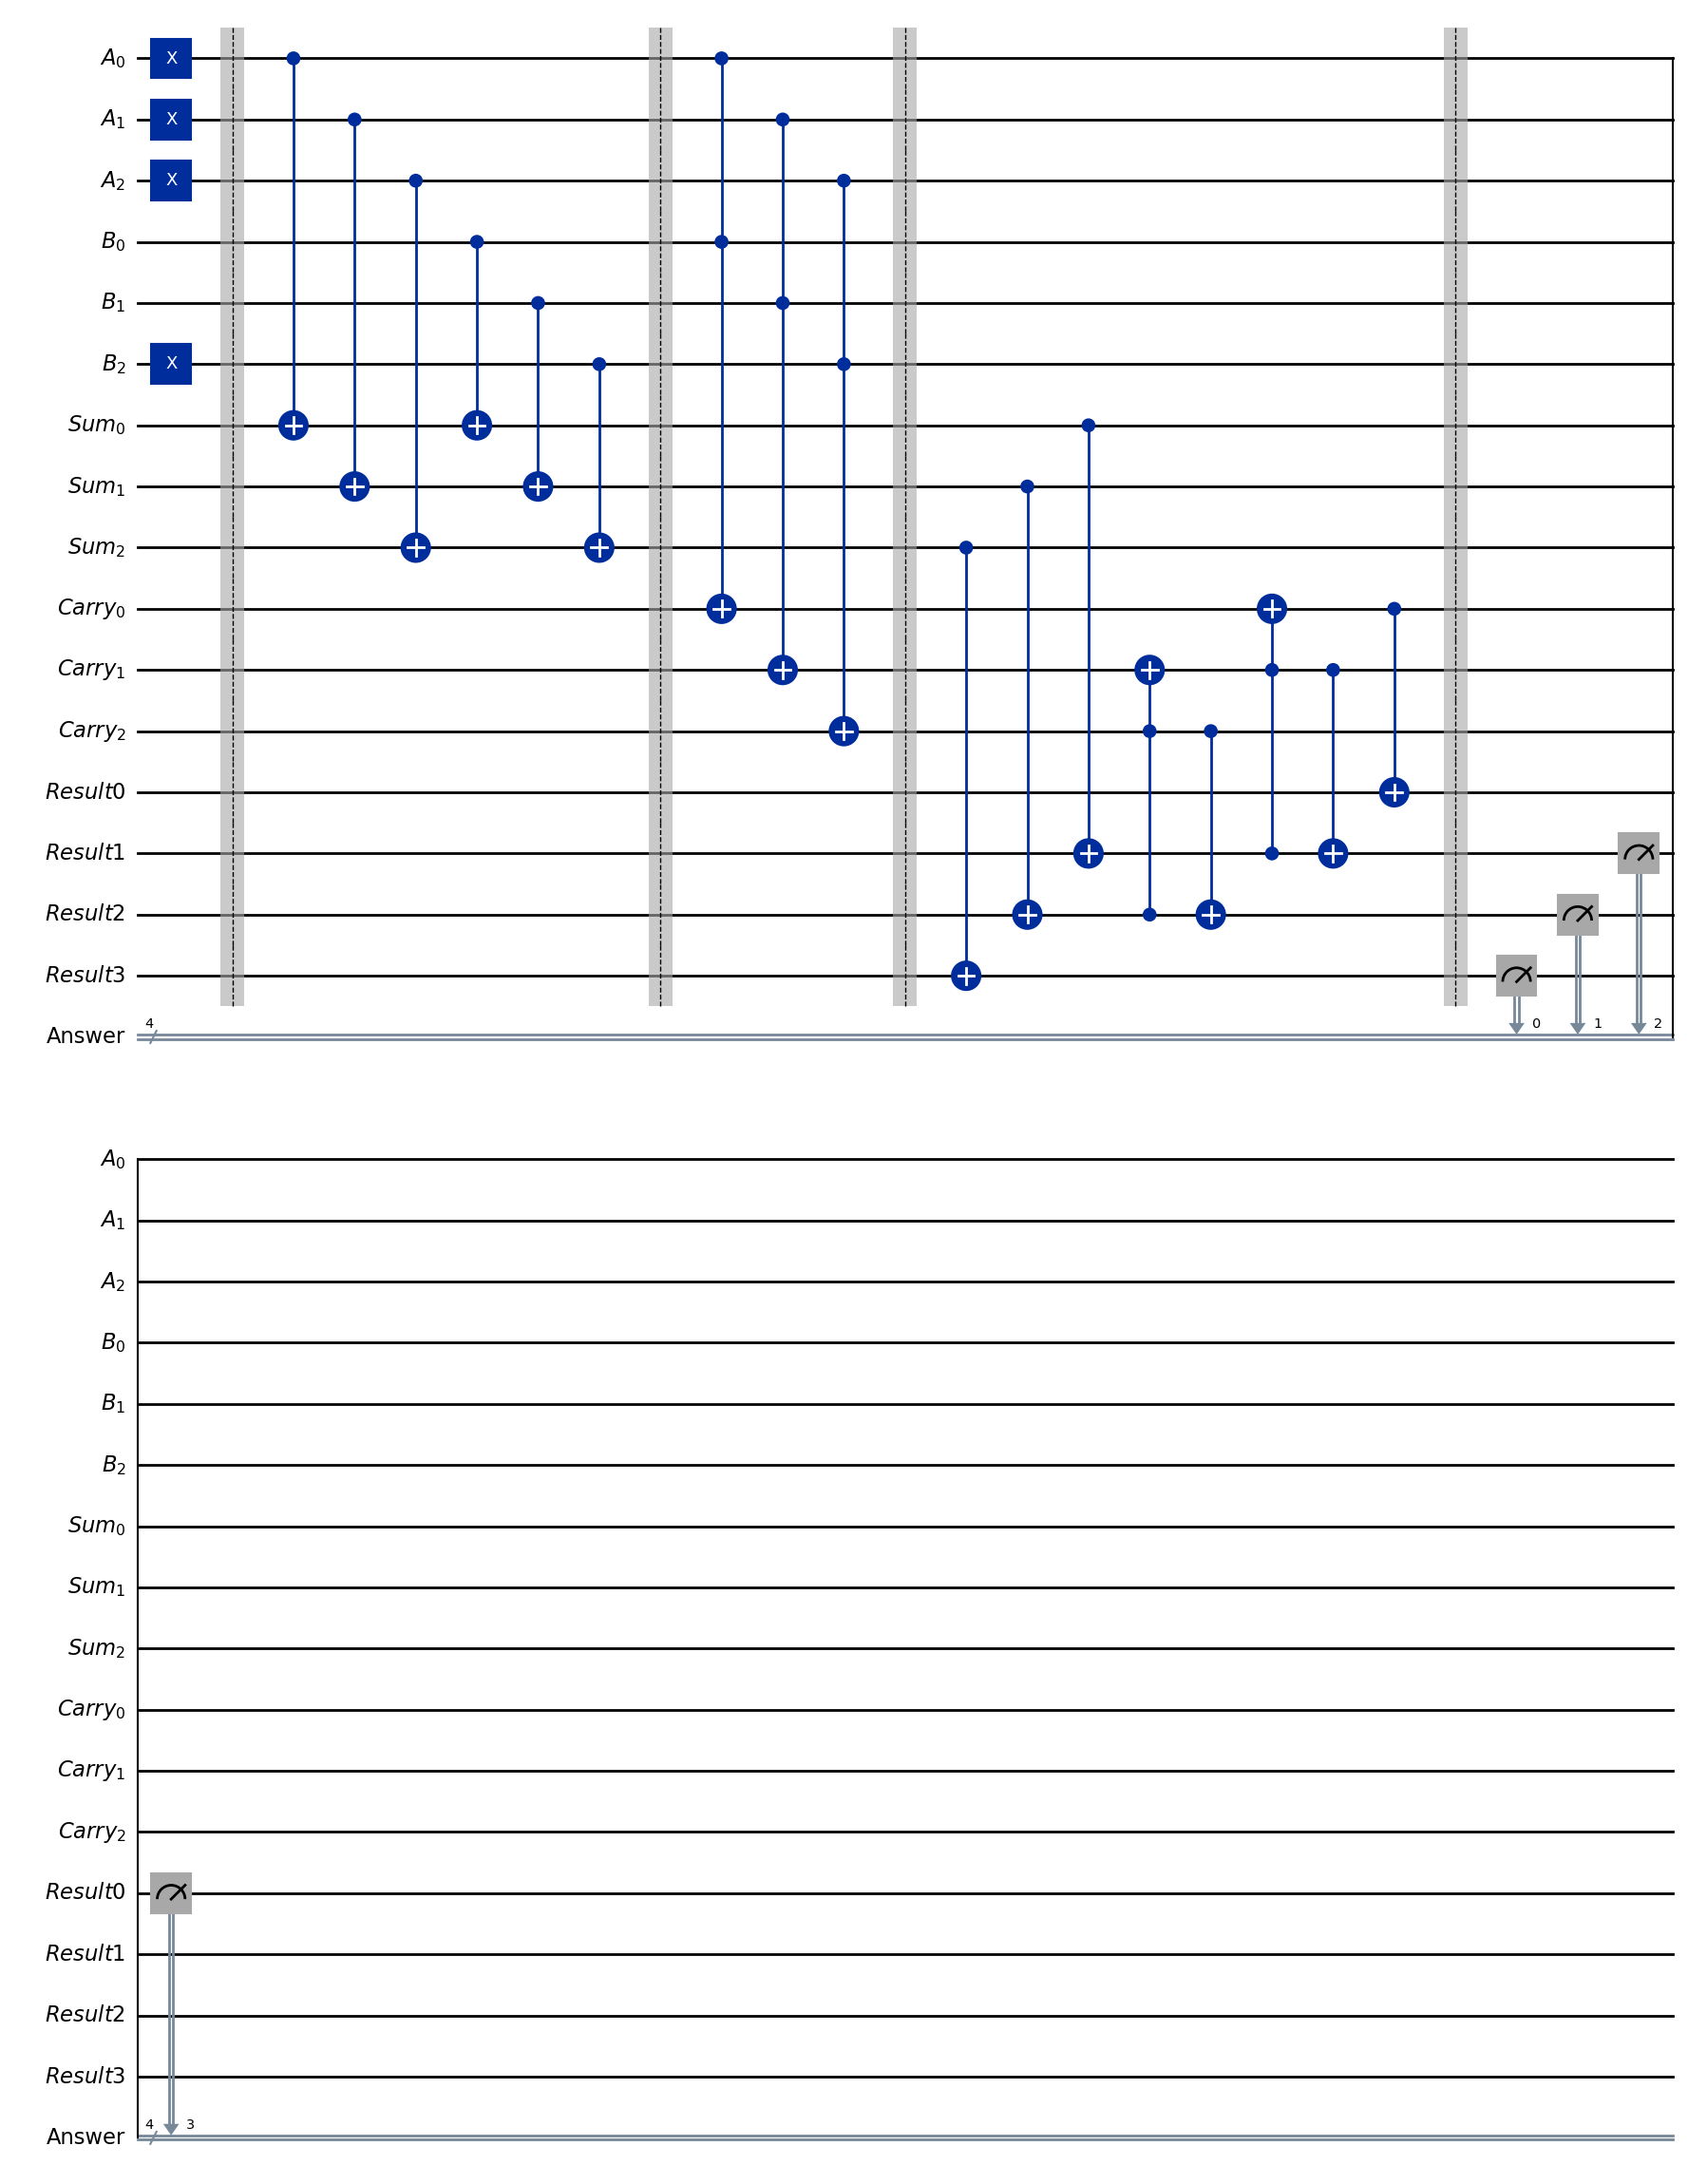

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


#A is first number's register and B is second number's register.

A = QuantumRegister(3, 'A')
B = QuantumRegister(3 , 'B')

S = QuantumRegister(3 , 'Sum')
C = QuantumRegister(3 , 'Carry')
R0 = QuantumRegister(1 , 'Result0')
R1 = QuantumRegister(1 , 'Result1')
R2 = QuantumRegister(1 , 'Result2')
R3 = QuantumRegister(1 , 'Result3')

Ans = ClassicalRegister(4 ,'Answer')

qc = QuantumCircuit(A,B,S,C,R0,R1,R2,R3,Ans)





########################   Input values as binary   #######################

x = input("Enter a binary number:")
y = input("Enter another binary number:")

for i, bit in enumerate(x):
    if bit == '1':
        qc.x(A[i])

for i, bit in enumerate(y):
    if bit == '1':
        qc.x(B[i])

############################################################################



qc.barrier()

#Add A[n] and B[n] values and copy them in S[n] (Sum) register

qc.cx(A[0],S[0])
qc.cx(B[0],S[0])
qc.cx(A[1],S[1])
qc.cx(B[1],S[1])
qc.cx(A[2],S[2])
qc.cx(B[2],S[2])

qc.barrier()

#checks if both A[n] and B[n] are '1' and copy result on C[n] (carry) register

qc.ccx(A[0],B[0],C[0])
qc.ccx(A[1],B[1],C[1])
qc.ccx(A[2],B[2],C[2])


qc.barrier()


qc.cx(S[2],R3)         #copy result of Sum of A[2] and B[2] (S[2]) to the Result register 'R3'
qc.cx(S[1],R2)         #copy result of Sum of A[1] and B[1] (S[1]) to the Result register 'R2'
qc.ccx(R2,C[2],C[1])   #Checks if the sum of A[1] and B[1] result any carry value. ıf any copy it to Carry register C[1]
qc.cx(C[2],R2)         #Checks if there a carry value on C[2] and apply it to the result R2
qc.cx(S[0],R1)         #copy result of Sum of A[0] and B[0] (S[0]) to the Result register 'R2'
qc.ccx(R1,C[1],C[0])   #Checks if the sum of A[0] and B[0] result any carry value. ıf any copy it to Carry register C[0]
qc.cx(C[1],R1)         #Checks if there a carry value on C[1] and apply it to the result R1
qc.cx(C[0],R0)         #Checks if there a carry value on C[0] and apply it to the result R0


qc.barrier()


qc.measure(R3,Ans[0])
qc.measure(R2,Ans[1])
qc.measure(R1,Ans[2])
qc.measure(R0,Ans[3])


qc.draw("mpl")

{'1000': 1024}


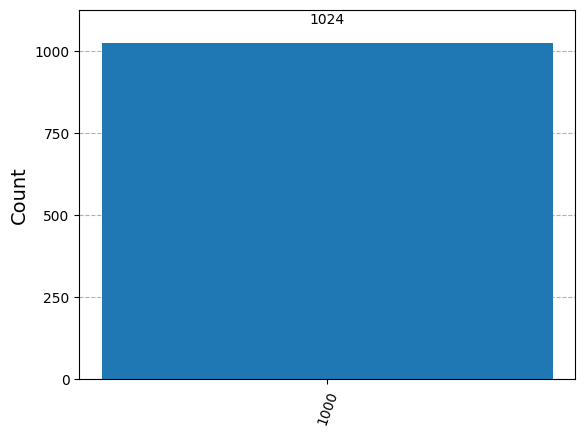

In [8]:
from qiskit_aer import AerSimulator


result = AerSimulator().run(qc).result()
stats = result.get_counts()

print(stats)

from qiskit.visualization import plot_histogram

plot_histogram(stats)

<IBMBackend('ibm_brisbane')>


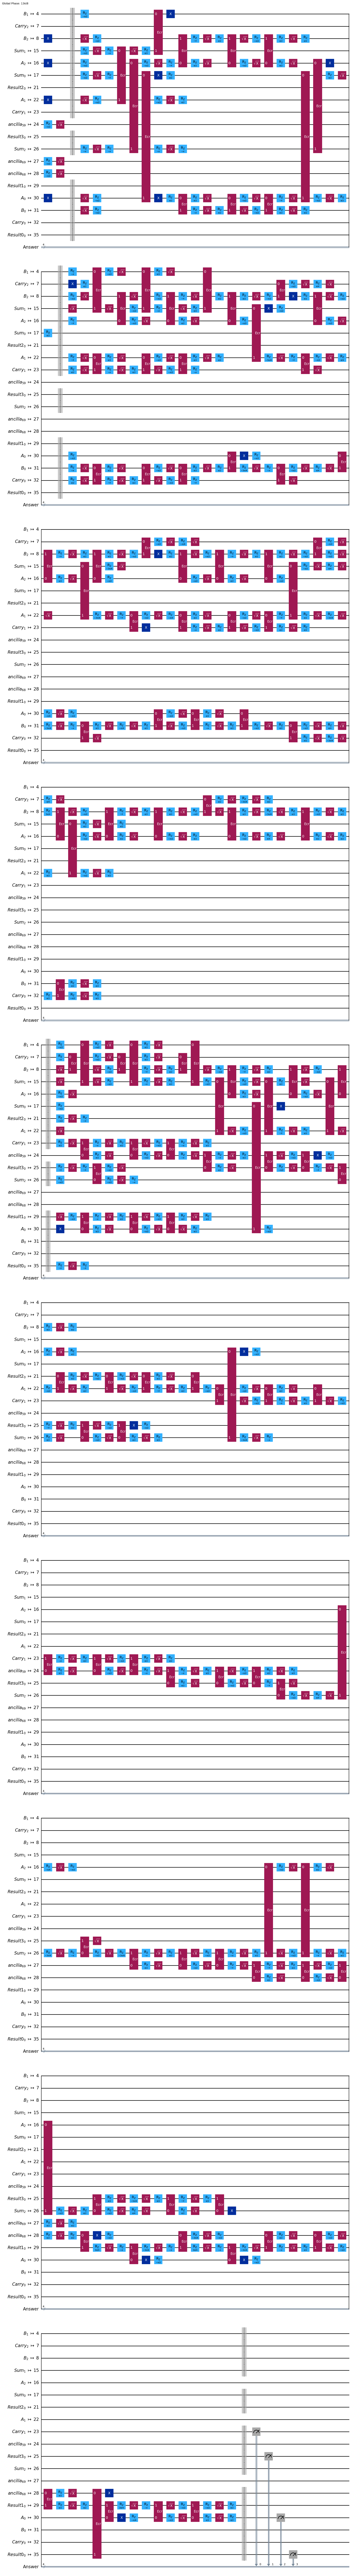

In [12]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService



# Specify the system to target
service = QiskitRuntimeService()
backend = service.least_busy()
print(backend)


# Transpile the circuit
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
transpiled_circ = pass_manager.run(qc)

# View the transpiled circuit
transpiled_circ.draw(output='mpl', idle_wires=False)

In [ ]:
job = backend.run(transpiled_circ)

Result(backend_name='ibm_brisbane', backend_version='0.0.0', qobj_id='Unknown', job_id='Unknown', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0xc': 270, '0x2': 453, '0xe': 302, '0x0': 440, '0xd': 62, '0x6': 609, '0xa': 383, '0x7': 99, '0x1': 81, '0x3': 86, '0xb': 66, '0x9': 62, '0x8': 353, '0x5': 113, '0x4': 566, '0xf': 55}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51

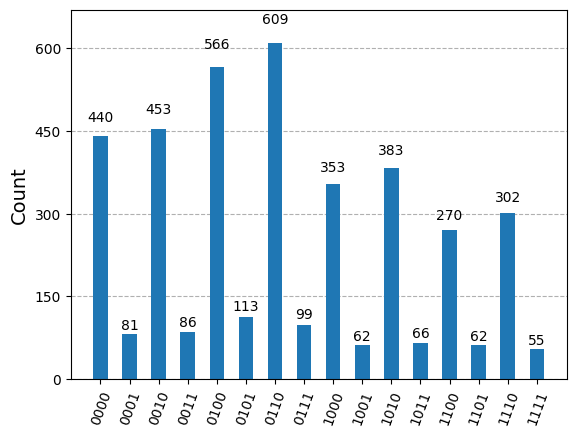

In [29]:
result = job.result()
print(result)
counts = result.get_counts()
plot_histogram(counts)

# Hardware Analysis Summary

Running the quantum Full Adder on hardware, rather than in simulation, yields inaccurate results. This inconsistency is mainly due to noise in the circuit and the deterioration of the initialized state (coherence time) due to energy loss as the circuit progresses.

Efforts to mitigate this error with a measurement error filter were unsuccessful due to the complexity and resources needed to account for every possible combination of numbers. The noise in a quantum circuit increases with the number of qubits and gates, which hinders scalability. This exponential increase in noise with the number of qubits is a significant issue, referred to as Quantum Volume.